In [93]:
import pandas as pd
import numpy as np

test_df = pd.read_csv('./datasets/human_test.csv')
train_df = pd.read_csv('./datasets/human_train.csv')

In [53]:
# train_df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [54]:
# train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [55]:
# train_df.isnull().sum().unique()

array([0])

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_df['Labels'] = encoder.fit_transform(train_df['Activity'])

In [ ]:
# train_df

In [ ]:
# train_df.describe()

In [ ]:
# train_df.index

In [95]:
column = pd.DataFrame(train_df.columns, columns=['column_name'])
column.index = np.arange(1, len(column) + 1)
column

,column_name
1,tBodyAcc-mean()-X
2,tBodyAcc-mean()-Y
3,tBodyAcc-mean()-Z
4,tBodyAcc-std()-X
5,tBodyAcc-std()-Y
...,...
560,"angle(Y,gravityMean)"
561,"angle(Z,gravityMean)"
562,subject
563,Activity


In [96]:
column = column.reset_index()

In [ ]:
# column = column.rename(columns={'index':'column_index'})

In [97]:
column

,index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"
561,562,subject
562,563,Activity


In [ ]:
# 컬럼 중복 확인 코드
# feature_dup_df = column.groupby('column_name').count()
# feature_dup_df

In [ ]:
# print(feature_dup_df[feature_dup_df['column_index'] > 1].count())

In [ ]:
# column.loc[column['column_name'] == 'fBodyAcc-bandsEnergy()-17,24']

In [51]:
# train_df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [108]:
import numpy as np

X_train = train_df.drop(['Activity', 'Labels', 'subject'], axis=1)
y_train = train_df['Labels']

X_test = test_df.drop(['Activity', 'subject'], axis=1)
y_test = LabelEncoder().fit_transform(test_df['Activity'])

In [99]:
from sklearn.tree import DecisionTreeClassifier

# max_depth = 
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [100]:
importances = pd.DataFrame(dt.feature_importances_, columns=['importances'])
importances['column_name'] = column['column_name']
importances

,importances,column_name
0,0.00000,tBodyAcc-mean()-X
1,0.00000,tBodyAcc-mean()-Y
2,0.00000,tBodyAcc-mean()-Z
3,0.00000,tBodyAcc-std()-X
4,0.00000,tBodyAcc-std()-Y
...,...,...
556,0.00122,"angle(tBodyGyroMean,gravityMean)"
557,0.00051,"angle(tBodyGyroJerkMean,gravityMean)"
558,0.00094,"angle(X,gravityMean)"
559,0.13259,"angle(Y,gravityMean)"


In [104]:
importances.sort_values(by=['importances'], ascending=False).head(10)
top10 = importances.sort_values(by=['importances'], ascending=False).head(10)
top10['column_name']

52                 tGravityAcc-min()-X
389    fBodyAccJerk-bandsEnergy()-1,16
559               angle(Y,gravityMean)
508               fBodyAccMag-energy()
74           tGravityAcc-arCoeff()-Z,2
448                fBodyGyro-maxInds-X
159        tBodyGyro-correlation()-Y,Z
57              tGravityAcc-energy()-Y
222          tGravityAccMag-arCoeff()1
129                  tBodyGyro-max()-X
Name: column_name, dtype: object

In [ ]:
# 교수님 feature_importances_ 뽑아낸 방법 ( Series 이용 )
# ftr_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
# ftr_importances.sort_values(ascending=False)[:10].index

In [113]:
top10_list = top10['column_name'].tolist()
top10_list

['tGravityAcc-min()-X',
 'fBodyAccJerk-bandsEnergy()-1,16',
 'angle(Y,gravityMean)',
 'fBodyAccMag-energy()',
 'tGravityAcc-arCoeff()-Z,2',
 'fBodyGyro-maxInds-X',
 'tBodyGyro-correlation()-Y,Z',
 'tGravityAcc-energy()-Y',
 'tGravityAccMag-arCoeff()1',
 'tBodyGyro-max()-X']

In [114]:
X_train_features_importances = X_train[top10_list]
X_train_features_importances

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2",fBodyGyro-maxInds-X,"tBodyGyro-correlation()-Y,Z",tGravityAcc-energy()-Y,tGravityAccMag-arCoeff()1,tBodyGyro-max()-X
0,0.97744,-0.99998,0.17994,-0.99829,0.99567,-1.00000,0.30110,-0.97091,-0.17318,-0.86704
1,0.98452,-0.99999,0.18029,-0.99947,0.83427,-1.00000,0.16939,-0.97058,0.08157,-0.86490
2,0.98677,-0.99996,0.18064,-0.99981,0.71439,-1.00000,-0.35065,-0.97037,0.03805,-0.86490
3,0.98682,-0.99998,0.18193,-0.99977,0.38637,-1.00000,-0.72530,-0.96940,-0.09286,-0.88532
4,0.98743,-0.99999,0.18515,-0.99987,0.23927,-1.00000,-0.72456,-0.96705,0.18044,-0.87015
...,...,...,...,...,...,...,...,...,...,...
7347,0.92055,-0.77574,0.23860,-0.58428,0.80250,-1.00000,0.33734,-0.91838,-0.61791,-0.41416
7348,0.92055,-0.78075,0.25268,-0.63254,0.72175,-0.93333,0.40632,-0.90288,-0.46882,-0.41416
7349,0.93301,-0.78362,0.24914,-0.64117,0.83544,-0.93333,0.48384,-0.90756,-0.49291,-0.51990
7350,0.93301,-0.82114,0.24643,-0.66358,0.85862,-0.93333,0.37682,-0.91065,-0.52618,-0.68567


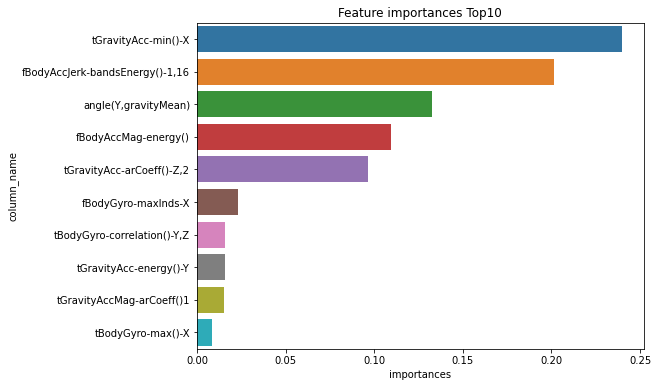

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top10')
sns.barplot(x=top10['importances'], y=top10['column_name'])
plt.show()


In [115]:
from sklearn.model_selection import GridSearchCV

params = {
	'max_depth' : [8, 12, 16, 20],
	'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train_features_importances, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [116]:
print('GridSearchCV 최고 평균 정확도 수치 : {0: .4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치 :  0.8872
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8, 'min_samples_split': 24}


In [119]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test[top10_list])
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도 : {0: .4f}'.format(accuracy))

결정 트리 예측 정확도 :  0.8616


In [120]:
accuracy_score(y_test, pred1)

0.8615541228367831

In [122]:
recall_score(y_test , pred1,average='macro')

0.8568135010081844

In [124]:
precision_score(y_test , pred1, average='macro')

0.8586169153802322

In [125]:
f1_score(y_test , pred1, average='macro')

0.857005989291716